In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as matdates
import seaborn as sns
import FinanceDataReader as fdr
import yfinance as yf
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
nvidia = yf.download('NVDA')
nvidia.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-05 00:00:00-04:00,389.089996,395.649994,387.070007,391.709991,391.669464,39609400
2023-06-06 00:00:00-04:00,388.299988,391.600006,381.480011,386.540009,386.500000,38872900
2023-06-07 00:00:00-04:00,389.149994,394.989990,373.559998,374.750000,374.750000,51199800
2023-06-08 00:00:00-04:00,377.239990,388.640015,375.049988,385.100006,385.100006,41777200
2023-06-09 00:00:00-04:00,390.369995,397.109985,385.670013,387.700012,387.700012,42722000


In [3]:
nvidia.loc[nvidia.isna().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [4]:
tqqq = yf.download('TQQQ')
tqqq.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-05 00:00:00-04:00,36.759998,37.700001,36.560001,36.900002,36.900002,103130900
2023-06-06 00:00:00-04:00,36.689999,37.160000,36.259998,36.860001,36.860001,79754500
2023-06-07 00:00:00-04:00,36.939999,37.560001,34.770000,34.980000,34.980000,114242700
2023-06-08 00:00:00-04:00,35.020000,36.380001,34.950001,36.180000,36.180000,94076900
2023-06-09 00:00:00-04:00,36.680000,37.619999,36.200001,36.619999,36.619999,103851700


In [5]:
# Check null values
nvidia.isin([np.nan, np.inf, -np.inf]).any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [6]:
tqqq.isin([np.nan, np.inf, -np.inf]).any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [7]:
nvidia.insert(0, 'Date', nvidia.index)

In [8]:
tqqq.insert(0, 'Date', tqqq.index)

In [9]:
nvidia.reset_index(drop=True, inplace=True)

In [10]:
tqqq.reset_index(drop=True, inplace=True)

In [11]:
nvidia.insert(1, 'Date_str', nvidia['Date'].dt.strftime('%Y-%m-%d'))

In [12]:
tqqq.insert(1, 'Date_str', tqqq['Date'].dt.strftime('%Y-%m-%d'))

In [13]:
nvidia.head()

,Date,Date_str,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22 00:00:00-05:00,1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376319,271468800
1,1999-01-25 00:00:00-05:00,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415743,51048000
2,1999-01-26 00:00:00-05:00,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383487,34320000
3,1999-01-27 00:00:00-05:00,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382293,24436800
4,1999-01-28 00:00:00-05:00,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381098,22752000


In [14]:
nvidia.loc[nvidia['Date_str']=='2001-09-13']

,Date,Date_str,Open,High,Low,Close,Adj Close,Volume


In [15]:
nvidia.dtypes

Date         datetime64[ns, America/New_York]
Date_str                               object
Open                                  float64
High                                  float64
Low                                   float64
Close                                 float64
Adj Close                             float64
Volume                                  int64
dtype: object

<Axes: >

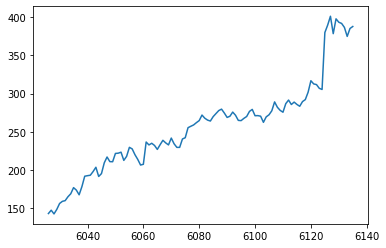

In [16]:
nvidia.loc[nvidia['Date_str'].str.contains('2023', na=False), 'Close'].plot()

In [17]:
nvidia.loc[nvidia['Date_str'].str.contains('2023', na=False), 'Date_str'].nunique()

110

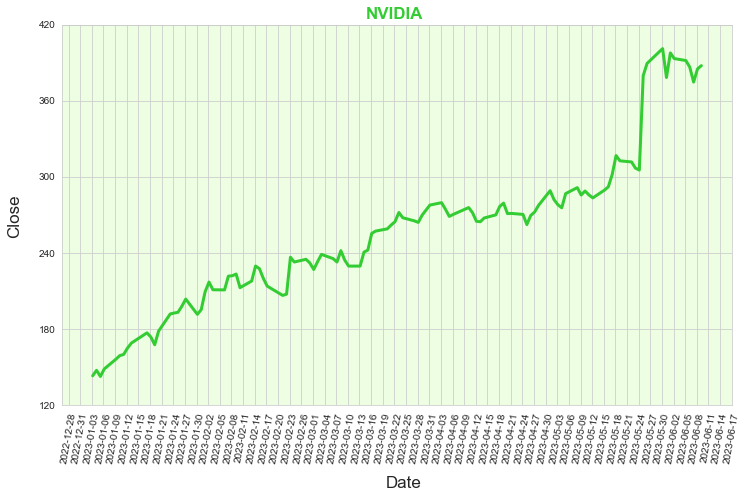

In [18]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
daylocator = matdates.DayLocator(interval=3)
ax = sns.lineplot(data=nvidia.loc[nvidia['Date_str'].str.contains('2023', na=False), :], 
                  x='Date', y='Close', lw=3, color = '#33CC33')
ax.xaxis.set_major_formatter(matdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(daylocator)
ax.set_facecolor('#EDFEE2')
ax.set(xlabel='', ylabel='')
#fig.suptitle('NVIDIA', fontsize=20, fontweight='bold')
fig.text(0.51, 0.9, 'NVIDIA', ha='center', va='center', fontsize=17, color='#33CC33', fontweight='bold')
fig.text(0.52, -0.03, 'Date', ha='center', va='center', fontsize=17)
fig.text(0.07, 0.5, 'Close', ha='center', va='center', rotation='vertical', fontsize=17)
ax.yaxis.get_label().set_fontsize(15)
ax.yaxis.label.set_color('#51585E')
ax.tick_params('x', labelrotation=80)
#ax.set_xlim(-1, 111)
#plt.xticks(np.arange(1, 110, step=2.5))
plt.yticks(np.arange(120, 421, step=60));
#for ax in fig.axes:
#    ax.tick_params(labelrotation=70);

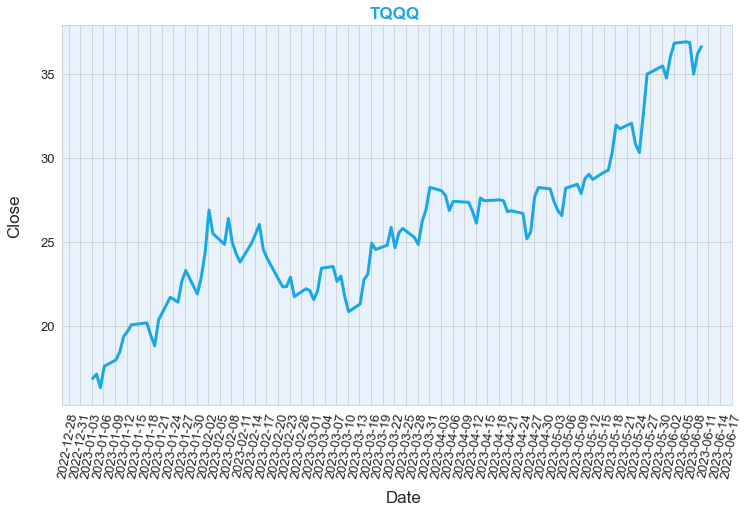

In [19]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
daylocator = matdates.DayLocator(interval=3)
ax = sns.lineplot(data=tqqq.loc[(tqqq['Date_str'].str.contains('2023', na=False))], 
                  x='Date', y='Close', lw=3, color = '#1AA7E6')
ax.xaxis.set_major_formatter(matdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(daylocator)
ax.set_facecolor('#E8F2FC')
ax.set(xlabel='', ylabel='')
#fig.suptitle('NVIDIA', fontsize=20, fontweight='bold')
fig.text(0.51, 0.9, 'TQQQ', ha='center', va='center', fontsize=17, color='#1AA7E6', fontweight='bold')
fig.text(0.52, -0.06, 'Date', ha='center', va='center', fontsize=17)
fig.text(0.07, 0.5, 'Close', ha='center', va='center', rotation='vertical', fontsize=17)
ax.yaxis.get_label().set_fontsize(15)
ax.yaxis.label.set_color('#E8F2FC')
ax.tick_params('x', labelrotation=80)
#plt.yticks(np.arange(200, 320, step=10));
#for ax in fig.axes:
#    ax.tick_params(labelrotation=70);
ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13);
#plt.setp(ax.get_yticklabels(), fontweight="bold")
#plt.setp(ax.get_xticklabels(), fontweight="bold");